# Kaggle - Titanic

In [46]:
from pathlib import Path
import kaggle
import numpy as np
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

## Load dataset

In [7]:
titanic_path = os.path.join("datasets", "titanic")
Path(titanic_path).mkdir(parents=True, exist_ok=True)

In [10]:
os.system(f"kaggle competitions download -c titanic -p {titanic_path}")

0

In [14]:
file_path = os.path.join(titanic_path, "titanic.zip")

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(titanic_path)

In [16]:
train_data = pd.read_csv(os.path.join(titanic_path, "train.csv"))
test_data = pd.read_csv(os.path.join(titanic_path, "test.csv"))

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
X_train = train_data[train_data.columns.drop("Survived")]
y_train = train_data["Survived"]
X_test = test_data

## Exploratory data analysis

In [38]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [269]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [276]:
def plot_data(data, column, chart_type="bar", size=(6, 6)):
    pclass_values = data[column].value_counts()
    y_pos = pclass_values.index
    x_pos = list(pclass_values)
    fig, ax = plt.subplots(1, 1)
    ax.bar(y_pos, x_pos)
    fig.set_size_inches(size)
    plt.xlabel(column)
    plt.ylabel("Amount")
    plt.xticks(y_pos)
    plt.show()

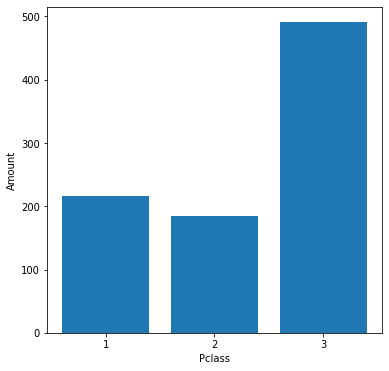

In [277]:
plot_data(X_train, "Pclass")

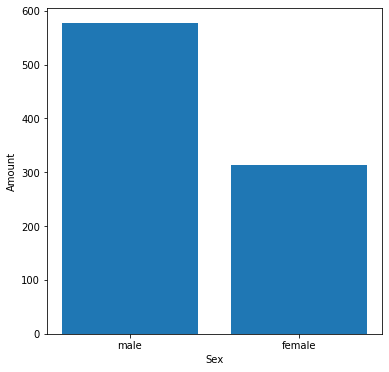

In [285]:
plot_data(X_train, "Sex")

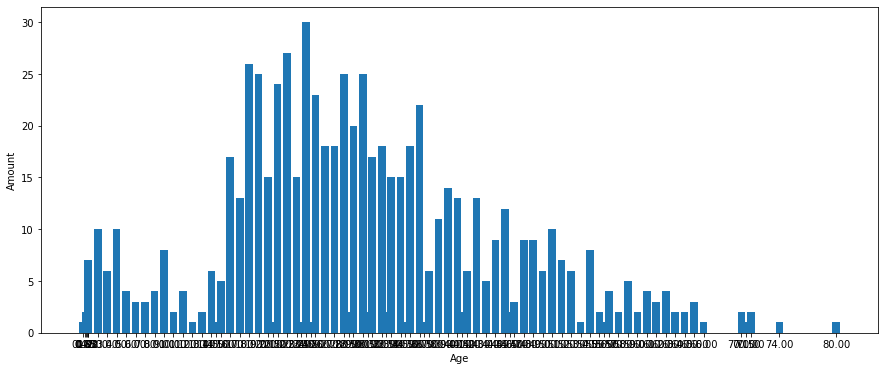

In [279]:
plot_data(X_train, "Age", size=(15, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC534E1648>]],
      dtype=object)

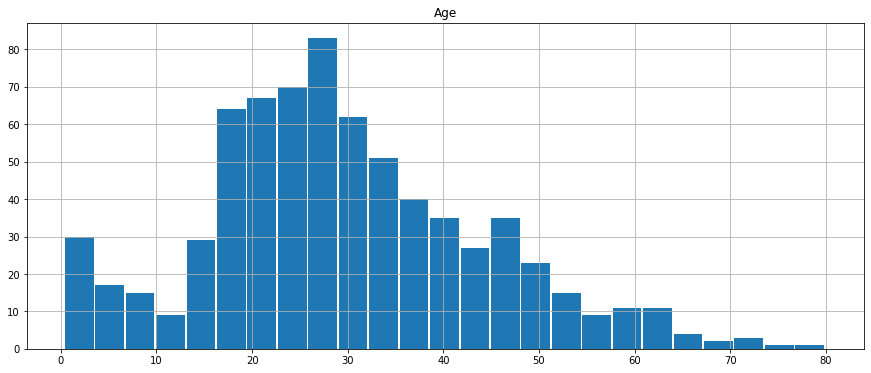

In [186]:
X_train.hist("Age", bins=25, width=3, figsize=(15, 6))

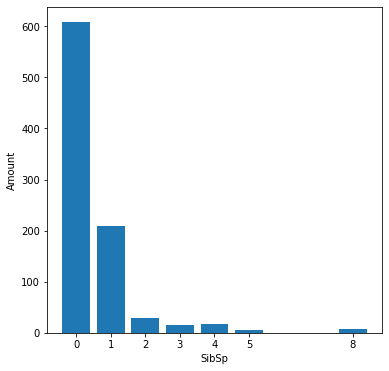

In [280]:
plot_data(X_train, "SibSp")

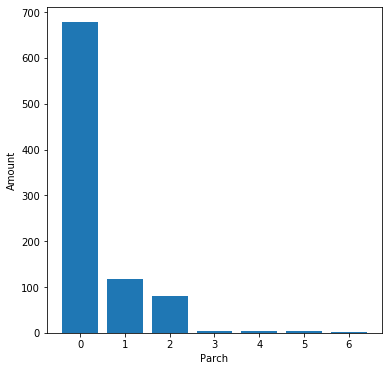

In [281]:
plot_data(X_train, "Parch")

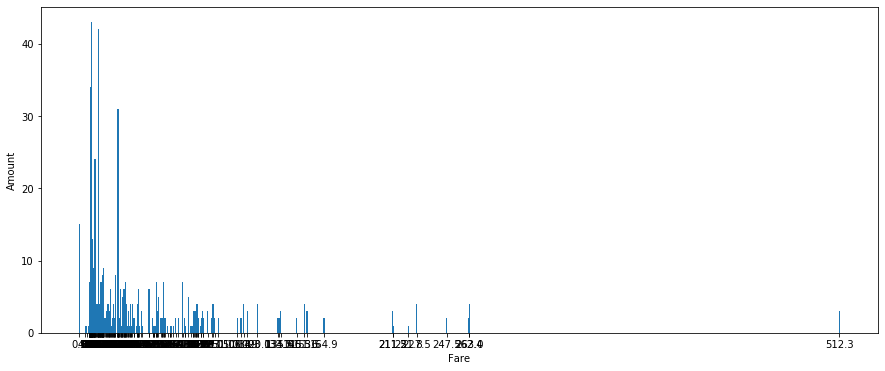

In [282]:
plot_data(X_train, "Fare", size=(15, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC53A8DE48>]],
      dtype=object)

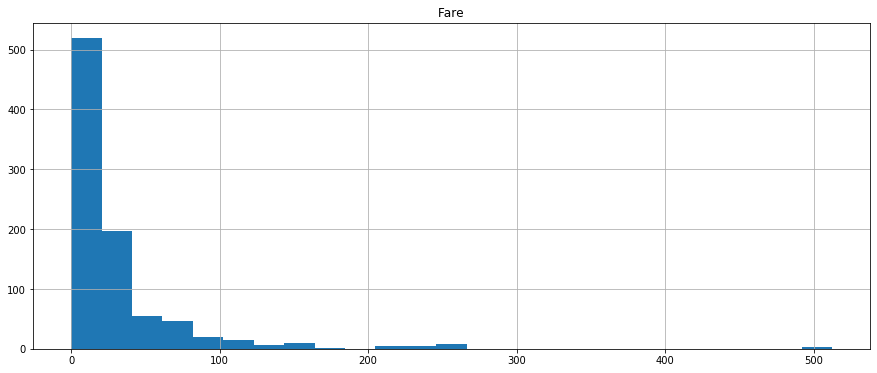

In [191]:
X_train.hist("Fare", bins=25, figsize=(15, 6))

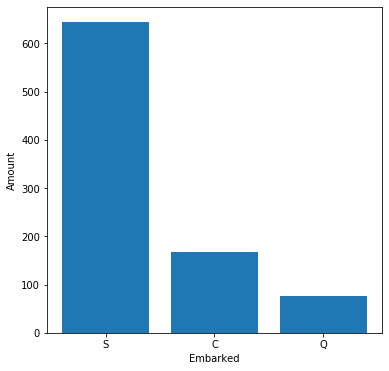

In [283]:
plot_data(X_train, "Embarked")

In [286]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

class TransformData(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        one_hot = pd.get_dummies(X["Pclass"], prefix="Pclass")
        X = X.join(one_hot)
        
        le = LabelEncoder()
        sex = le.fit_transform(X["Sex"])
        X["Sex_Label"] = sex
        
        one_hot = pd.get_dummies(X["Embarked"], prefix="Embarked")
        X = X.join(one_hot)
        
        return X

class SelectColumns(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
#         columns = ["Pclass_1", "Pclass_2", "Pclass_3", "Sex_Label", "Age", "Parch", "Fare", "Embarked_S", "Embarked_C", "Embarked_Q"]
        columns = ["Pclass_1", "Pclass_2", "Pclass_3", "Sex_Label", "Parch"]
        return X[columns]

In [287]:
pipeline = Pipeline([
    ('transform_data', TransformData()),
    ('select_columns', SelectColumns())
])

X_train_processed = pipeline.fit_transform(X_train)
X_train_processed.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_Label,Parch
0,0,0,1,1,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,1,1,0


In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [289]:
log_clf = LogisticRegression()
log_clf.fit(X_train_processed, y_train)

C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [325]:
def predict_results(model, data, actual):
    predict = model.predict(data)
    total = len(actual)

    correct = sum(predict == actual)
    print(f"\nAccuracy: {correct} out of {total}... {correct / total * 100}%")
    
    true_negative = sum((predict == actual) & (predict == 0))
    true_positive = sum((predict == actual) & (predict == 1))
    false_negative = sum((predict != actual) & (predict == 0))
    false_positive = sum((predict != actual) & (predict == 1))
    
    conf_matrix = np.array([
        [true_negative, false_positive],
        [false_negative, true_positive]
    ])
    
    print("\nConfusion Matrix:\n", conf_matrix)
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = true_positive / (true_positive + (2 / (false_negative + false_positive)))
    
    print(f"\nPrecision: {precision}, Recall: {recall}, F1 Score: {f1_score}")
    


In [326]:
predict_results(log_clf, pipeline.fit_transform(X_train), y_train)


Accuracy: 706 out of 891... 79.2368125701459%

Confusion Matrix:
 [[474  75]
 [110 232]]

Precision: 0.755700325732899, Recall: 0.6783625730994152, F1 Score: 0.999953403848842


In [327]:
forest = RandomForestClassifier()
forest.fit(X_train_processed, y_train)

C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [300]:
predict = forest.predict(pipeline.fit_transform(X_train))

In [301]:
correct = sum(predict == y_train)
total = len(y_train)
print(f"{correct} out of {total}... {correct / total * 100}%")

717 out of 891... 80.47138047138047%


In [290]:
predict = log_clf.predict(pipeline.fit_transform(X_test))

In [293]:
sum(predict == y_test)

NameError: name 'y_test' is not defined